In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import numpy as np

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Step 1： Read Data

In [2]:
wine = pd.read_csv('wine_data.csv',header=None,delimiter=',')

In [3]:
wine_data = wine.values

In [4]:
X_data = wine_data[:,1:]

In [5]:
X_data.shape

(178, 13)

In [6]:
Y_data = wine_data[:,0]

### Step 2: Date Preparation

##### 1） standardize data

In [7]:
Scaler = StandardScaler()

(array([12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.60000e-01, 1.05234e+02, 2.10208e+02, 3.15182e+02, 4.20156e+02,
        5.25130e+02, 6.30104e+02, 7.35078e+02, 8.40052e+02, 9.45026e+02,
        1.05000e+03]),
 <a list of 10 Patch objects>)

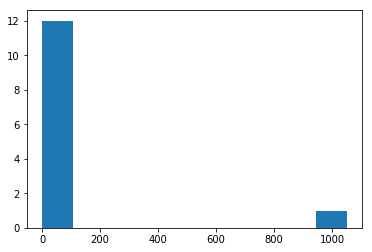

In [8]:
plt.hist(X_data[1])

In [9]:
X_data = Scaler.fit_transform(X_data)

(array([2., 1., 3., 1., 2., 0., 2., 1., 0., 1.]),
 array([-0.49840699, -0.23496952,  0.02846795,  0.29190542,  0.5553429 ,
         0.81878037,  1.08221784,  1.34565531,  1.60909279,  1.87253026,
         2.13596773]),
 <a list of 10 Patch objects>)

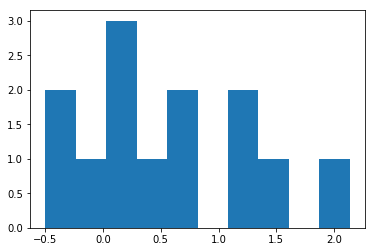

In [10]:
plt.hist(X_data[2])

#### 2) Onehot coding for target variable

In [11]:
 OH_Encoder= OneHotEncoder()

In [12]:
Y_data.shape[0]

178

In [13]:
Y_data = Y_data.reshape(Y_data.shape[0],1)

In [14]:
Y_data = OH_Encoder.fit_transform(Y_data)

In [15]:
Y_data.shape

(178, 3)

#### 3) train test split

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size = 0.3,random_state = 3)

### Step 4: Buiding TensorFlow Deep Learning Model

In [17]:
input_data = tf.placeholder(shape=(None,X_train.shape[1]),dtype=tf.float32)
input_target = tf.placeholder(shape=(None,Y_train.shape[1]),dtype=tf.int64)

In [18]:
input_target.shape

TensorShape([Dimension(None), Dimension(3)])

In [19]:
input_data.shape

TensorShape([Dimension(None), Dimension(13)])

In [20]:
def get_weight_variables(shape):
    init = tf.truncated_normal(shape=shape,stddev=0.1)
    return tf.Variable(init)

In [21]:
def get_bias_variable(shape):
    init = tf.constant(0.1, shape=shape)
    return tf.Variable(init)

In [22]:
def add_variable_summaries(var):
    with tf.name_scope('summaries'):
        ### change of average vaiebales
        with tf.name_scope('mean'):
            mean = tf.reduce_mean(var)
        ### add it to summary dashborad
        tf.summary.scalar('mean',mean)
        
        ### add this vaiable to historm to know distribution
        tf.summary.histogram('histogram',var)

In [23]:
### to construct a hidden layer
def hidden_layer(input_data,output_feature_num,scope= 'hidden_layer',act= tf.nn.relu,reuse  = tf.AUTO_REUSE):
    input_feature_num = input_data.get_shape().as_list()[-1]
    with tf.name_scope(scope):
        ### create weight variables:
        weight = get_weight_variables(shape=[input_feature_num,output_feature_num])
        ### add to summaries
        add_variable_summaries(weight)
        
    with tf.name_scope('bias'):
        bias = get_bias_variable(shape=output_feature_num)
        add_variable_summaries(bias)
    
    with tf.name_scope('linear'):
        ### calculate xw+b
        pre_act = tf.matmul(input_data,weight)+bias
        add_variable_summaries('pre_activation',pre_act)
        
    ## acitvate it
    output = act(pre_act)
    
    tf.summary.histogram('output',output)
    
    return output

In [24]:
### contrcut DNN Nework
def DNN(input_data,hidden_layer_structure,scope = 'DNN',reuse = tf.AUTO_REUSE):
    with tf.name_scope(scope):
        net = input_data
        for i,output_feature_num in enumerate(hidden_layer_structure):
            net =hidden_layer(input_data=net,output_feature_num=output_feature_num,scope='hidden%d' % (i+1),reuse = reuse)
        ### last output layer
        net = hidden_layer(net,output_feature_num=Y_data.shape[1],scope='classification',act=tf.identity,reuse=reuse)
        
        return net

In [25]:
dnn_with_sums = DNN(input_data, hidden_layer_structure = [200, 100])

TypeError: 'int' object is not iterable